In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df=pd.read_csv('Customer_Churn.csv')

In [3]:
#Displaying all the columns
pd.set_option('display.max_columns',None)

In [4]:
#Seeing the first five of dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
#Checking the shape of the dataset
df.shape

(3333, 21)

Observation:
    
    The dataset consist of 3333 rows and 21 columns.

In [6]:
#Show all of the columns
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
#Checking the data type of columns
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [8]:
#Seeing the information of the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

Observation:
    
    1-The data type consist of three type of datatypes, categorical, numeric and boolean.
    
    2-Our target feature is in Boolean data type.

    3-We can create three new columns:
        
        a. total minutes = adding minutes from day, evening and night. 
        
        b. total charge = adding charge from day, evening and night. 
        
        c. total calls = adding calls from day, evening and night.

## To check the missing values

In [9]:
#Checking the missing values in data set
df.isnull().values.any()

False

In [10]:
#Checking the missing values in data set column
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

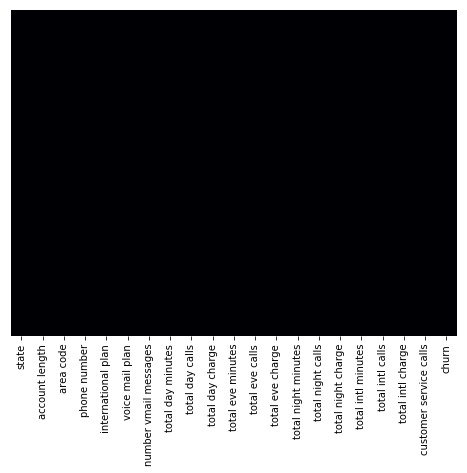

In [11]:
#Seeing the null values via visualization
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')
plt.show()

Observation:
    
    There is no missing values in our data set.

# Summary Statistics

In [12]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Observation:
    
    1-The minimum minutes given by a telecom company is zero for day time and in evening where as in nights the minimum 
      minutes is 23 minutes.
        
    2-The maximum minutes given by a telecom company is 350 minutes in day time , 363 minutes in evening time and 395 
      minutes in night time.
        
    3-The minimum customer service calls is zero times and maximum is nine times.
    
    4-Maximum minutes given by telecom company for International calls 20 minutes and for that minutes they charge for 
      maximum 5.5 rupees.
        
    5-The data is right skewed in some columns because of mean is greater than medium and those columns are area code and
       number vmail messages.
        
    6-The difference between 75% amd maximum is higher in most of the columns so outliers are present which needs to be 
      removed.

In [13]:
#Here we check the summary of object and boolean columns
df.describe(include=['object','bool'])

,state,phone number,international plan,voice mail plan,churn
count,3333,3333,3333,3333,3333
unique,51,3333,2,2,2
top,WV,419-3937,no,no,False
freq,106,1,3010,2411,2850


In [14]:
#Get customer churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

## Data Exploration

In [15]:
#Printing the object data types and their unique values

for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('******************************************************************************')  
    if df[column].dtype==np.number:
        print(str(column) + ' : ' + str(df[column].nunique()))
        print(df[column].unique())
        print('*******************************************************************************')

state : ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
MI     73
VT     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
MA     65
MS     65
RI     65
AZ     64
FL     63
MO     63
NM     62
ND     62
ME     62
DE     61
NE     61
OK     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
******************************************************************************
phone number : ['382-4657' '371-7191' '358-1921' ... '328-8230' '364-6381' '400-4344']
419-3937    1
385-6778    1
33

In [16]:
#Checking the number of customer who stayed or leave.
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [17]:
#Checking the customers churn percentage wise.
df['churn'].value_counts(normalize=True) *100

False    85.508551
True     14.491449
Name: churn, dtype: float64

Observation:
    
    85.5% of customers do not churn and only 14.5% of customers churn.

# To check the correlation

In [18]:
#Seeing the correlation
df.corr()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


Here we can see the correlation between the columns.

For Better understanding we can see it via visualization(with the help of heatmap).

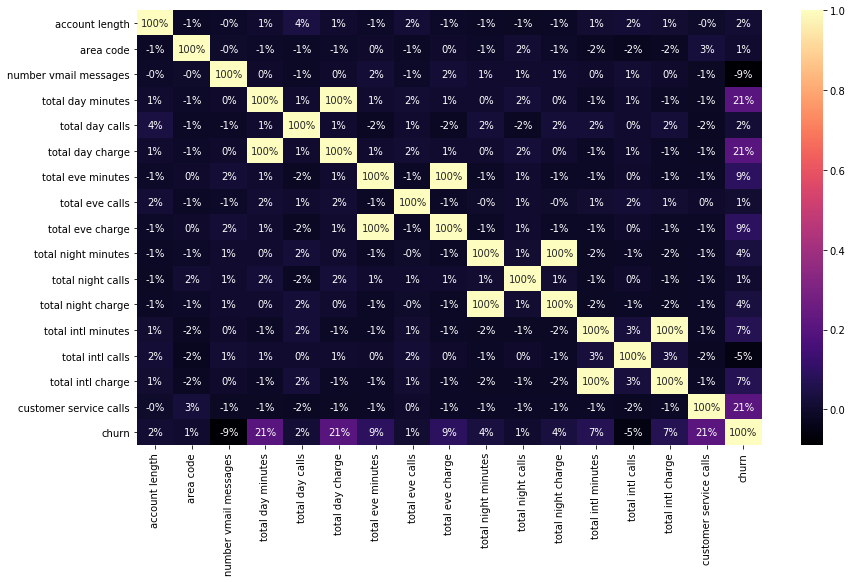

In [19]:
#Seeing the correlation via visualization
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='magma')
plt.show()

Text(0.5,1,'Correlation with target Variable')

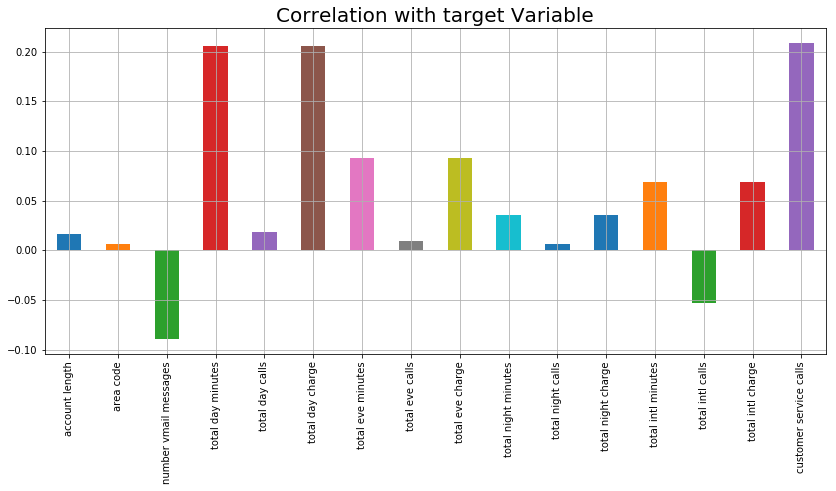

In [20]:
#Checking the correlation with target variable
plt.figure(figsize=(14,6))
df.drop('churn', axis=1).corrwith(df['churn']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=20)

Observation:
    
    1-Total day minutes, total day charge and customers service calls is slightly higher correlated with the our target
      feature i.e. Churn.
    
    2-Number of voice mail message and Total International calls is negative correlated with Target feature.
    
    3-In this dataset no columns is very highly correlated with target features or each other.

In [21]:
#Creating new columns total minutes, total calls, total charge

df['total minutes'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls']
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

In [22]:
#Checking the shape of dataset
df.shape

(3333, 24)

In [23]:
#Seeing the first two row of dataset.
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False,707.2,300,72.86
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False,611.5,329,55.54


# Visualization

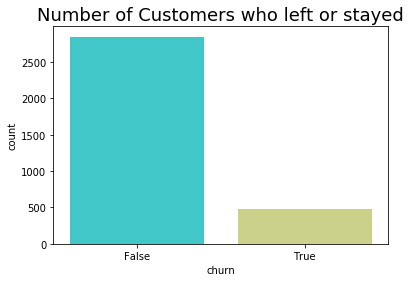

False    2850
True      483
Name: churn, dtype: int64


In [24]:
#Checking how many customers left or stayed.

sns.countplot(df['churn'],palette= 'rainbow')
plt.title("Number of Customers who left or stayed",fontsize=18)
plt.show()

print(df.churn.value_counts())

Observation:
    
    1-483 customers out of 3333 customers is churned

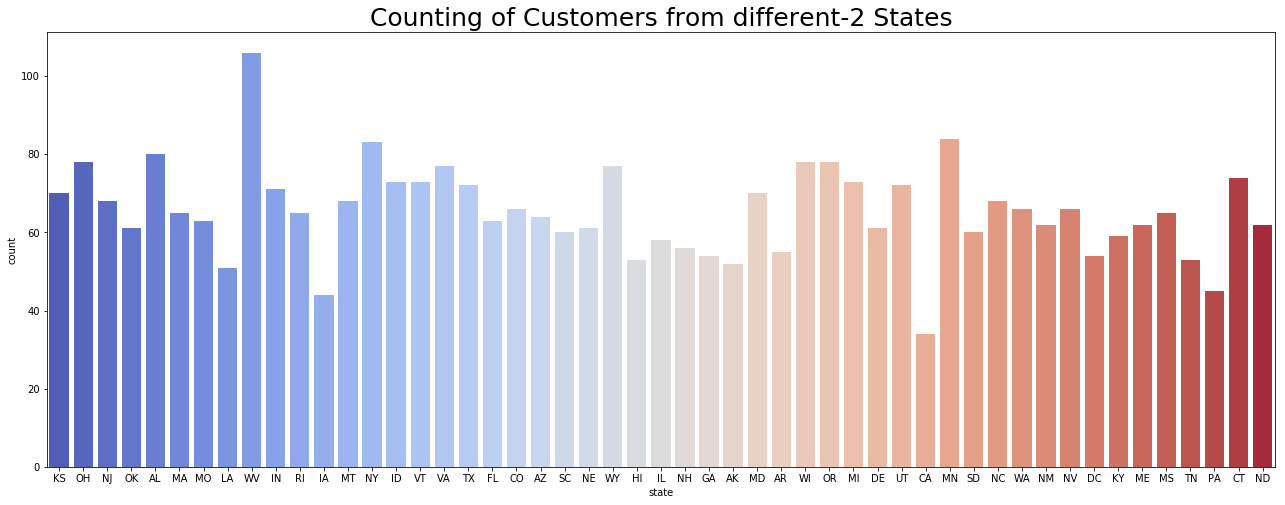

In [25]:
#Checking the counting of state
plt.figure(figsize=(22,8))
sns.countplot(df['state'], palette='coolwarm')
plt.title('Counting of Customers from different-2 States',fontsize=25)
plt.show()

Observation:
    
    1-The highest number of customers are from WV State.
    
    2-The minimum number of customers are from CA state.

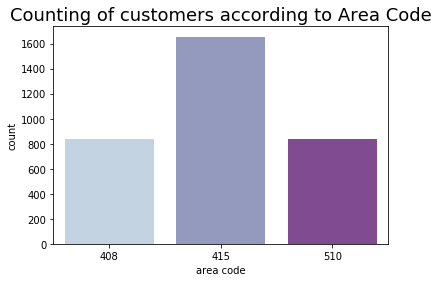

415    1655
510     840
408     838
Name: area code, dtype: int64


In [26]:
#Checking number of customers from area code.

sns.countplot(df['area code'],palette= 'BuPu')
plt.title("Counting of customers according to Area Code",fontsize=18)
plt.show()

print(df['area code'].value_counts())

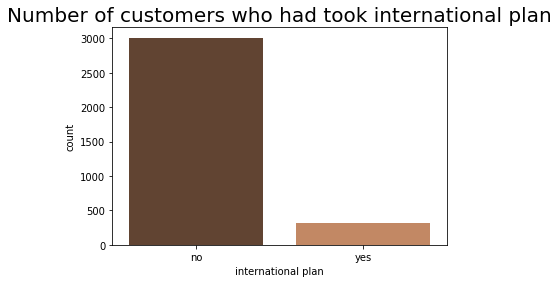

no     3010
yes     323
Name: international plan, dtype: int64


In [27]:
#Checking how many customers took the international plan.

sns.countplot(df['international plan'],palette= 'copper')
plt.title("Number of customers who had took international plan",fontsize=20)
plt.show()

print(df['international plan'].value_counts())

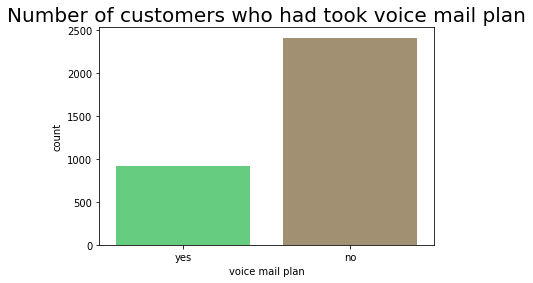

no     2411
yes     922
Name: voice mail plan, dtype: int64


In [28]:
#Checking how many customers who took the voice mail plan.

sns.countplot(df['voice mail plan'],palette= 'terrain')
plt.title("Number of customers who had took voice mail plan",fontsize=20)
plt.show()

print(df['voice mail plan'].value_counts())

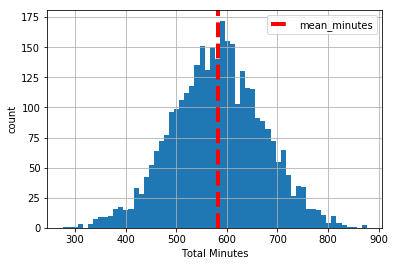

In [29]:
#Checking the Distribution of Total minutes and its mean

fees = df['total minutes'].hist(bins=60)
mean_val = np.mean(df['total minutes'])
plt.axvline(mean_val,linewidth=4,  color='red', label='mean_minutes',linestyle='dashed')
plt.xlabel('Total Minutes')
plt.ylabel('count')
plt.legend()
plt.show()

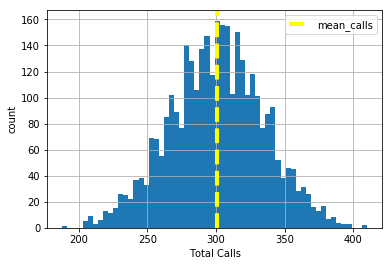

In [30]:
#Checking the Distribution of Total calls and its mean

fees = df['total calls'].hist(bins=60)
mean_val = np.mean(df['total calls'])
plt.axvline(mean_val,linewidth=4,  color='yellow', label='mean_calls',linestyle='dashed')
plt.xlabel('Total Calls')
plt.ylabel('count')
plt.legend()
plt.show()

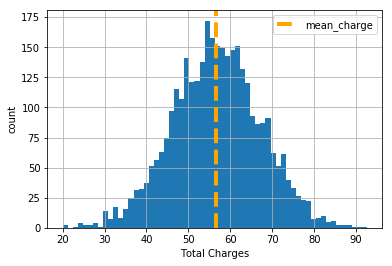

In [31]:
#Checking the Distribution of Total call charges and its mean

fees = df['total charge'].hist(bins=60)
mean_val = np.mean(df['total charge'])
plt.axvline(mean_val,linewidth=4,  color='orange', label='mean_charge',linestyle='dashed')
plt.xlabel('Total Charges')
plt.ylabel('count')
plt.legend()
plt.show()

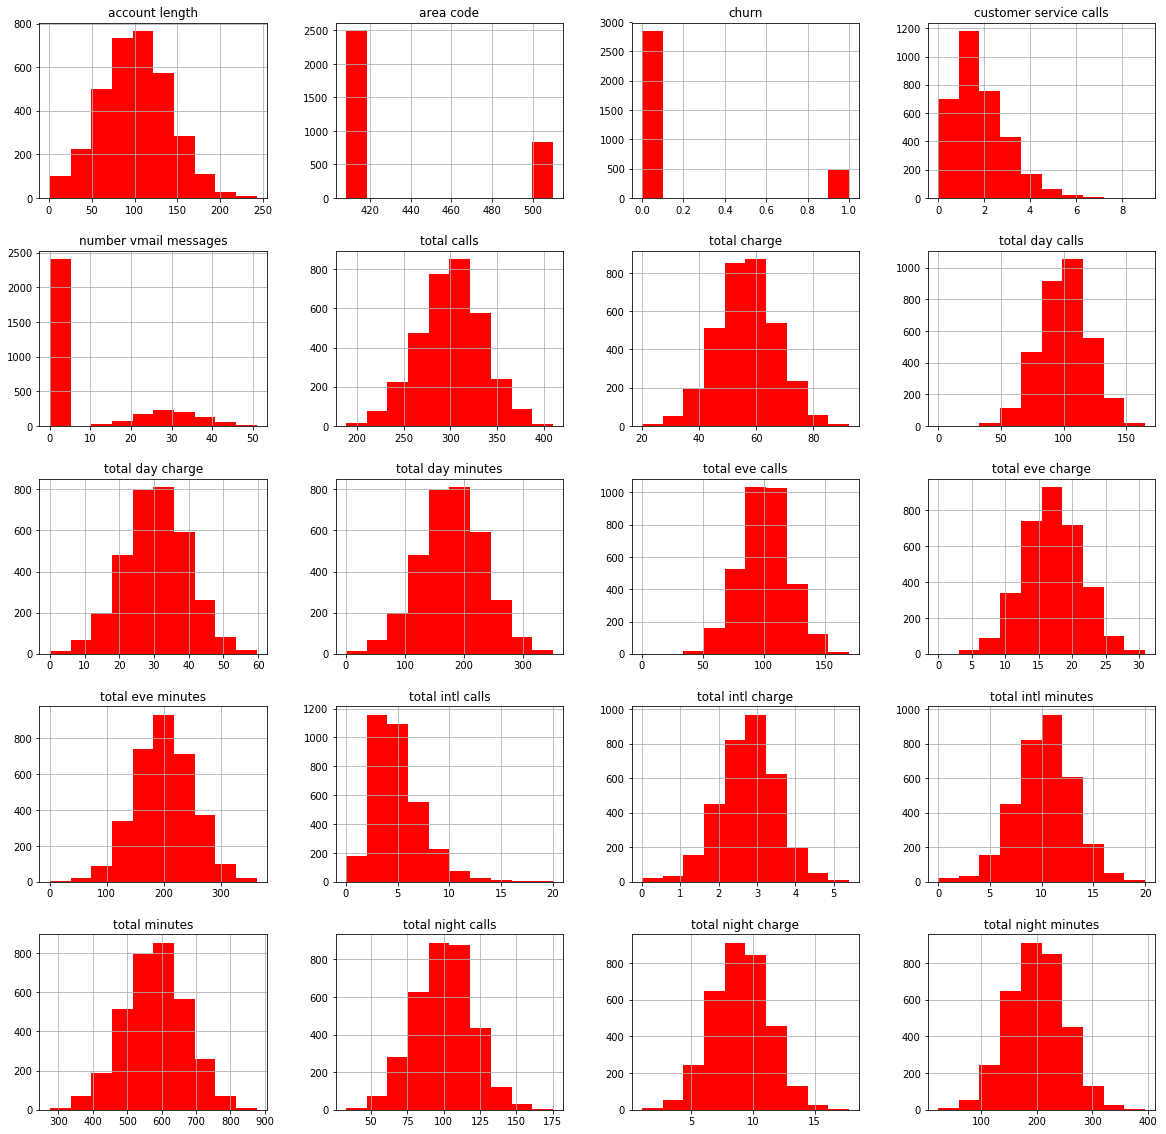

In [32]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

Observation:
    
    1-Here we saw the histogram of numeric columns.
    
    2-Most of the data is uniformaly distributed except area code,churn and customer service calls column.

# Bivariate Analysis

### State vs Churn

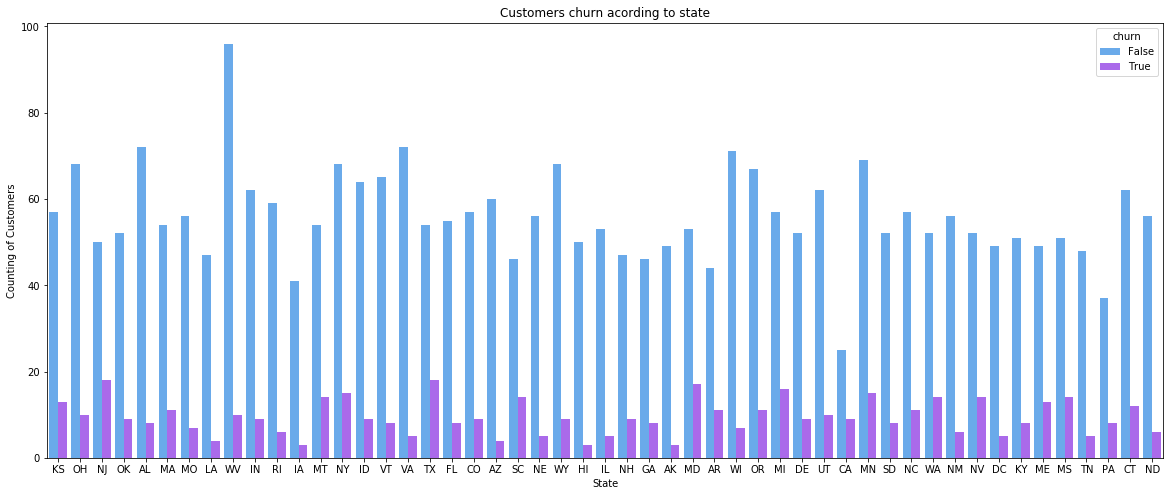

In [33]:
#Customers churn according to state
plt.figure(figsize=(20,8))
sns.countplot(x="state",hue='churn',data=df, palette='cool')
plt.title("Customers churn acording to state")
plt.xlabel('State')
plt.ylabel('Counting of Customers')
plt.show()

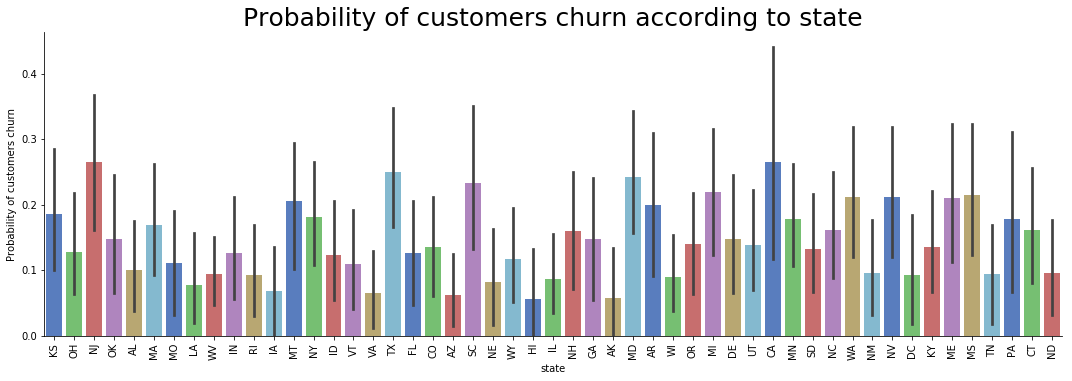

In [34]:
#Factor plot of State vs Churn
sns.factorplot(x="state",y="churn",data=df,kind="bar",size = 5,palette = "muted",aspect=3)
plt.title('Probability of customers churn according to state',fontsize=25)
plt.ylabel("Probability of customers churn")
plt.xticks(rotation='vertical')
plt.show()

Observation:
    
    1-Maximum customers churn in NJ, TX, MD and MI state.
    
    2-Probability of customers churn is maximum in NJ, TX, MD, SC, and CA. 

### Area Code vs Churn

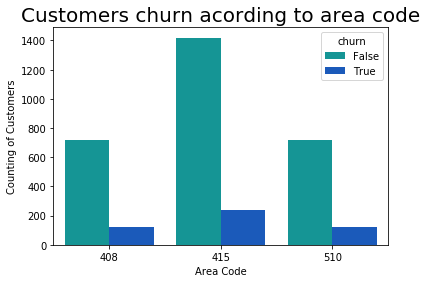

area code  churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: churn, dtype: int64


In [35]:
#Customers churn according to Area code

sns.countplot(x="area code",hue='churn',data=df, palette='winter_r')
plt.title("Customers churn acording to area code",fontsize=20)
plt.xlabel('Area Code')
plt.ylabel('Counting of Customers')
plt.show()

print(df.groupby('area code')['churn'].value_counts())

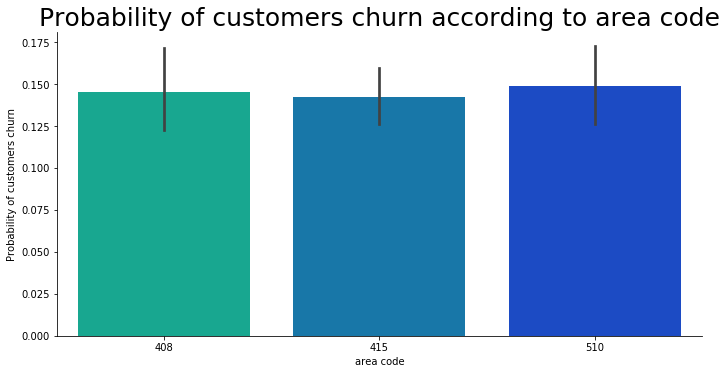

In [36]:
#Factor plot of Area vs Churn
sns.factorplot(x="area code", y="churn", data=df, kind="bar", size = 5, palette = "winter_r", aspect=2)
plt.title('Probability of customers churn according to area code',fontsize=25)
plt.ylabel("Probability of customers churn")
plt.xticks(rotation='horizontal')
plt.show()

Observation:
    
    1-area code  churn
        408        False     716
                   True      122
        415        False    1419
                   True      236
        510        False     715
                   True      125
    
    2-Maximum probability of customers churn in area code 510.

### International Plan vs Churn

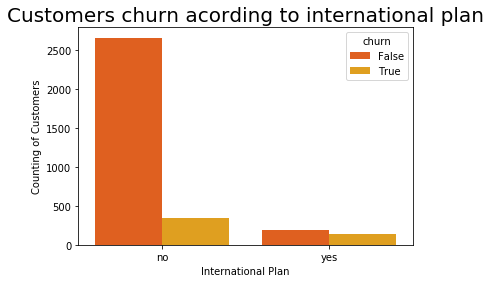

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
Name: churn, dtype: int64


In [37]:
#Customers churn according to International plan

sns.countplot(x="international plan", hue='churn', data=df, palette='autumn')
plt.title("Customers churn acording to international plan", fontsize=20)
plt.xlabel('International Plan')
plt.ylabel('Counting of Customers')
plt.show()

print(df.groupby('international plan')['churn'].value_counts())

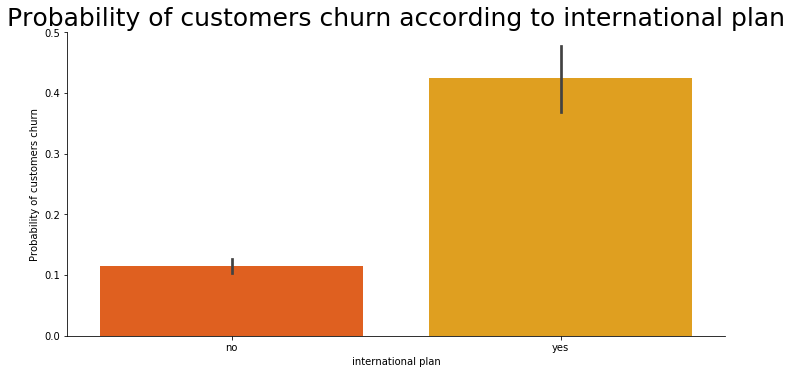

In [38]:
#Factor plot of International plan vs Churn
sns.factorplot(x="international plan", y="churn", data=df, kind="bar", size = 5, palette = "autumn", aspect=2)
plt.title('Probability of customers churn according to international plan',fontsize=25)
plt.ylabel("Probability of customers churn")
plt.xticks(rotation='horizontal')
plt.show()

Observation:
    
    1- international plan  churn
    
        No                  False    2664
                            True      346
        Yes                 False     186
                            True      137
        
    2-Maximum customers churn who took international plan.  

### Voice mail plan vs Churn

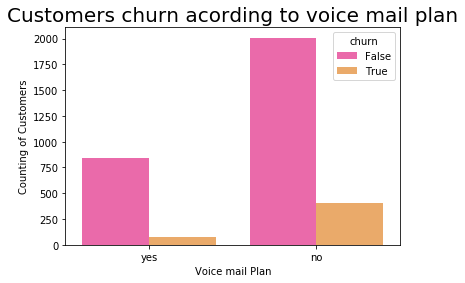

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
Name: churn, dtype: int64


In [39]:
#Customers churn according to voice mail plan

sns.countplot(x="voice mail plan", hue='churn', data=df, palette='spring')
plt.title("Customers churn acording to voice mail plan", fontsize=20)
plt.xlabel('Voice mail Plan')
plt.ylabel('Counting of Customers')
plt.show()

print(df.groupby('voice mail plan')['churn'].value_counts())

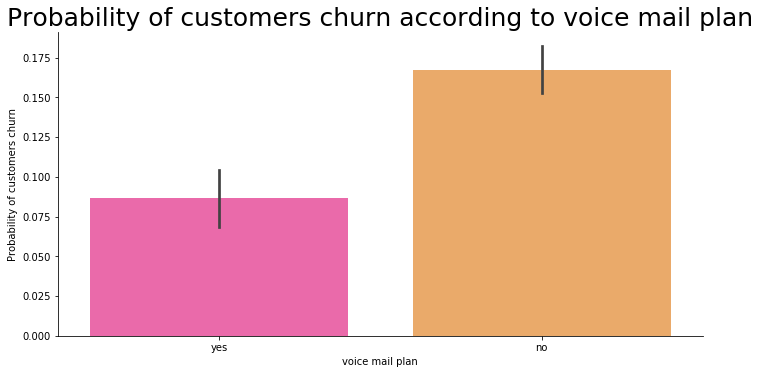

In [40]:
#Factor plot of voice mail plan vs Churn
sns.factorplot(x="voice mail plan", y="churn", data=df, kind="bar", size = 5, palette = "spring", aspect=2)
plt.title('Probability of customers churn according to voice mail plan',fontsize=25)
plt.ylabel("Probability of customers churn")
plt.xticks(rotation='horizontal')
plt.show()

Observation:
    
    1-voice mail plan  churn
        no               False    2008
                         True      403
        
        yes              False     842
                         True       80
    2-Maximum Customers churn who have not voice mail plan.

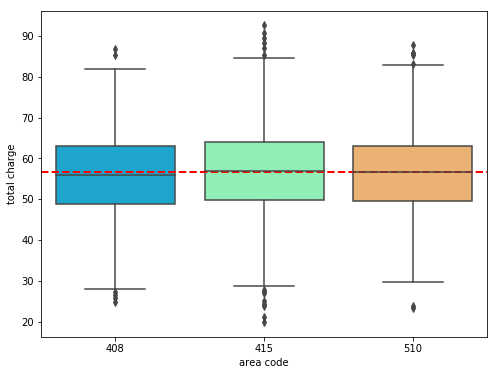

In [41]:
#Area code wise mean charge

plt.figure(figsize=(8,6))
mean_charge=np.mean(df['total charge'])
sns.boxplot(y='total charge',x='area code',data=df,palette ="rainbow")
plt.axhline(mean_charge,color='r',linestyle='dashed',linewidth=2)
plt.show()


Observation:
    
    1-The mean charge is equal for all the three area code.
    
    2-Total charge is little bit high and low in area code 415 which may be outliers.

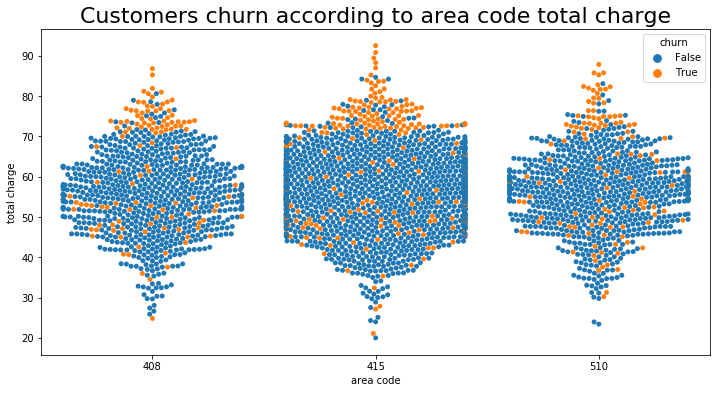

In [42]:
#Checking the churn of customers a\c to area code and their total charges..
plt.figure(figsize=(12,6))
sns.swarmplot(x="area code", y="total charge", hue='churn', data=df, palette='tab10')
plt.title('Customers churn according to area code total charge',fontsize=22)
plt.show()


Observation:
    
    Most of the customers churn when total charges is greater than 70 rupees.

### Customers Service Calls vs Churn

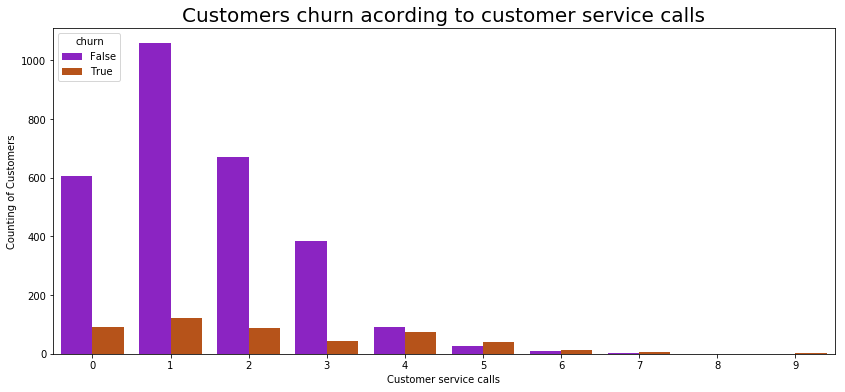

customer service calls  churn
0                       False     605
                        True       92
1                       False    1059
                        True      122
2                       False     672
                        True       87
3                       False     385
                        True       44
4                       False      90
                        True       76
5                       True       40
                        False      26
6                       True       14
                        False       8
7                       True        5
                        False       4
8                       False       1
                        True        1
9                       True        2
Name: churn, dtype: int64


In [43]:
#Customers churn according to Customers service calls
plt.figure(figsize=(14,6))
sns.countplot(x="customer service calls", hue='churn', data=df, palette='gnuplot')
plt.title("Customers churn acording to customer service calls", fontsize=20)
plt.xlabel('Customer service calls')
plt.ylabel('Counting of Customers')
plt.show()

print(df.groupby('customer service calls')['churn'].value_counts())

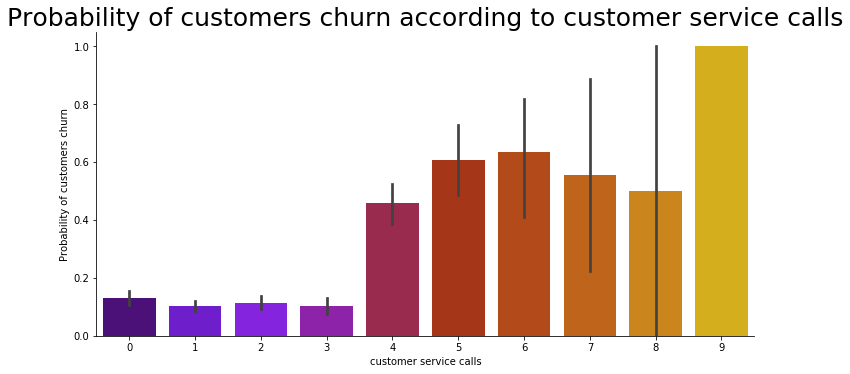

In [44]:
#Factor plot of International plan vs Churn
sns.factorplot(x="customer service calls", y="churn", data=df, kind="bar", size = 5, palette = "gnuplot", aspect=2)
plt.title('Probability of customers churn according to customer service calls',fontsize=25)
plt.ylabel("Probability of customers churn")
plt.xticks(rotation='horizontal')
plt.show()

# Checking skewness

### To check the distribution of skewness

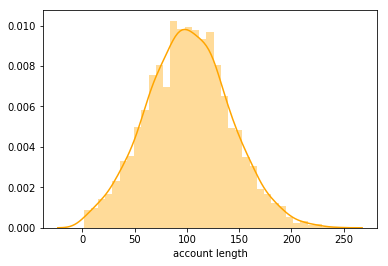

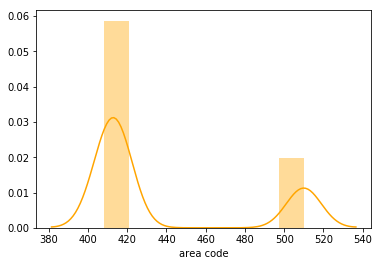

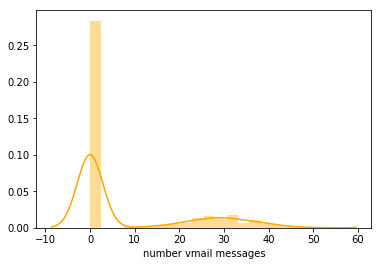

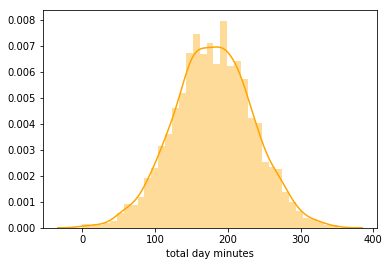

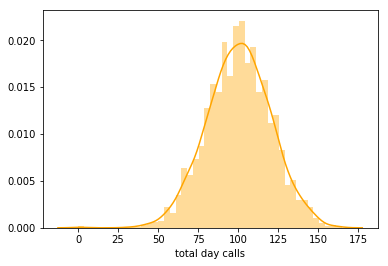

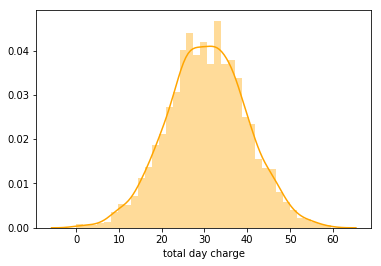

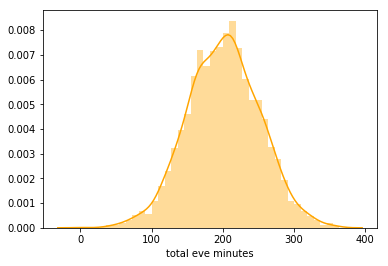

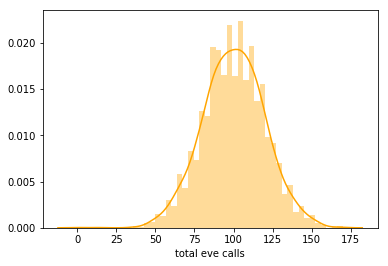

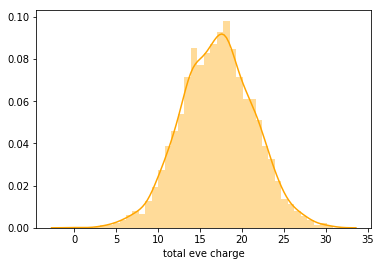

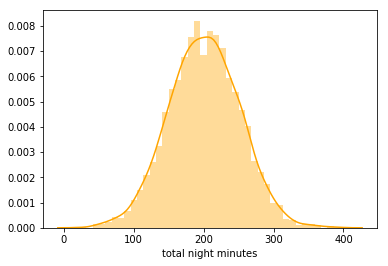

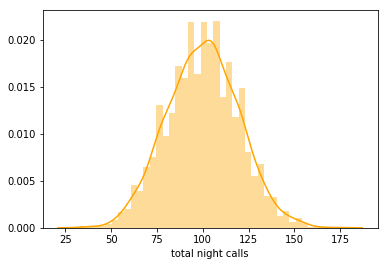

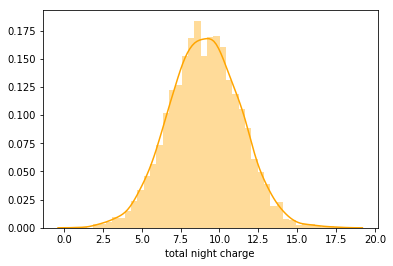

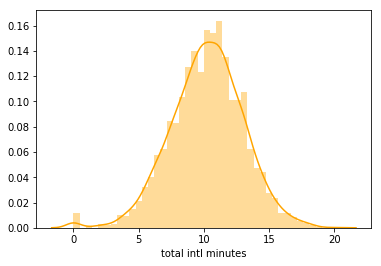

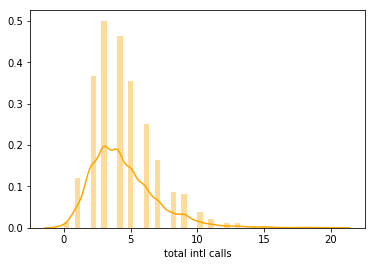

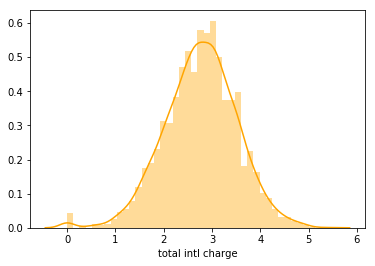

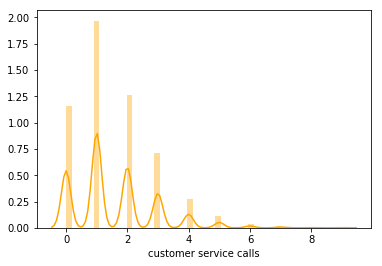

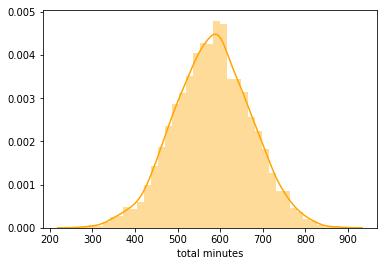

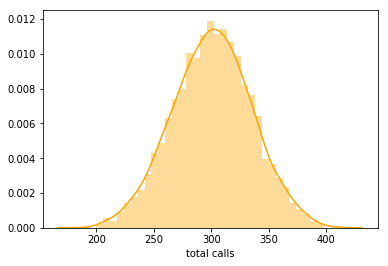

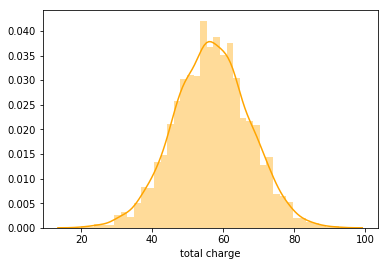

In [45]:
for col in df.describe().columns:
    sns.distplot(df[col],color='orange')
    plt.show()

In [46]:
df.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
churn                     2.018356
total minutes            -0.036998
total calls              -0.039384
total charge             -0.033641
dtype: float64

Observation:
    
    Some of the columns is skewed which we handel it via scaling because if we remove skewness via log method or boxcox
    then NaN value occures in these columns.

# Handeling categorical columns

In [47]:
#Transform Non numeric columns into Numeric columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [48]:
df.dtypes

state                       int64
account length              int64
area code                   int64
phone number                int64
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
total minutes             float64
total calls                 int64
total charge              float64
dtype: object

In [49]:
df.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,16,126,1,1926,0,1,19,265.1,70,45.07,197.4,60,16.78,244.7,49,11.01,10.0,3,2.70,1,0,707.2,95,72.86
1,35,105,1,1575,0,1,20,161.6,83,27.47,195.5,64,16.62,254.4,61,11.45,13.7,3,3.70,1,0,611.5,124,55.54
2,31,135,1,1117,0,0,0,243.4,74,41.38,121.2,71,10.30,162.6,62,7.32,12.2,5,3.29,0,0,527.2,123,59.00


# Plotting Outliers

In [50]:
df['churn'].unique()

array([0, 1], dtype=int64)

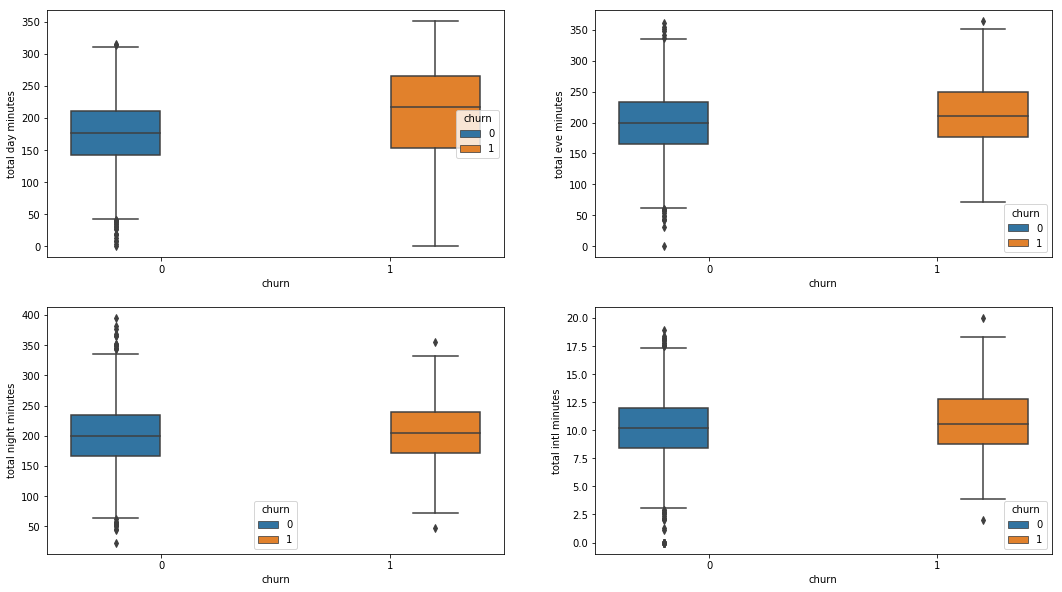

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'churn', y = 'total day minutes', hue = 'churn', data = df)
sns.boxplot(ax=ax2, x = 'churn', y = 'total eve minutes', hue = 'churn', data = df)
sns.boxplot(ax=ax3, x = 'churn', y = 'total night minutes', hue = 'churn', data = df)
sns.boxplot(ax=ax4, x = 'churn', y = 'total intl minutes', hue = 'churn', data = df)

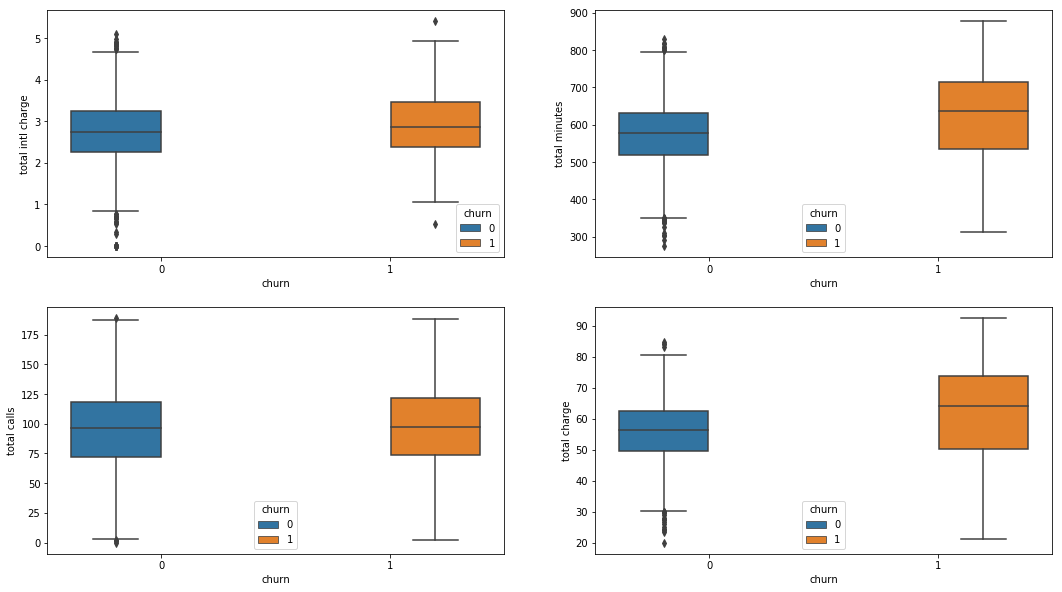

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'churn', y = 'total intl charge', hue = 'churn', data = df)
sns.boxplot(ax=ax2, x = 'churn', y = 'total minutes', hue = 'churn', data = df)
sns.boxplot(ax=ax3, x = 'churn', y = 'total calls', hue = 'churn', data = df)
sns.boxplot(ax=ax4, x = 'churn', y = 'total charge', hue = 'churn', data = df)

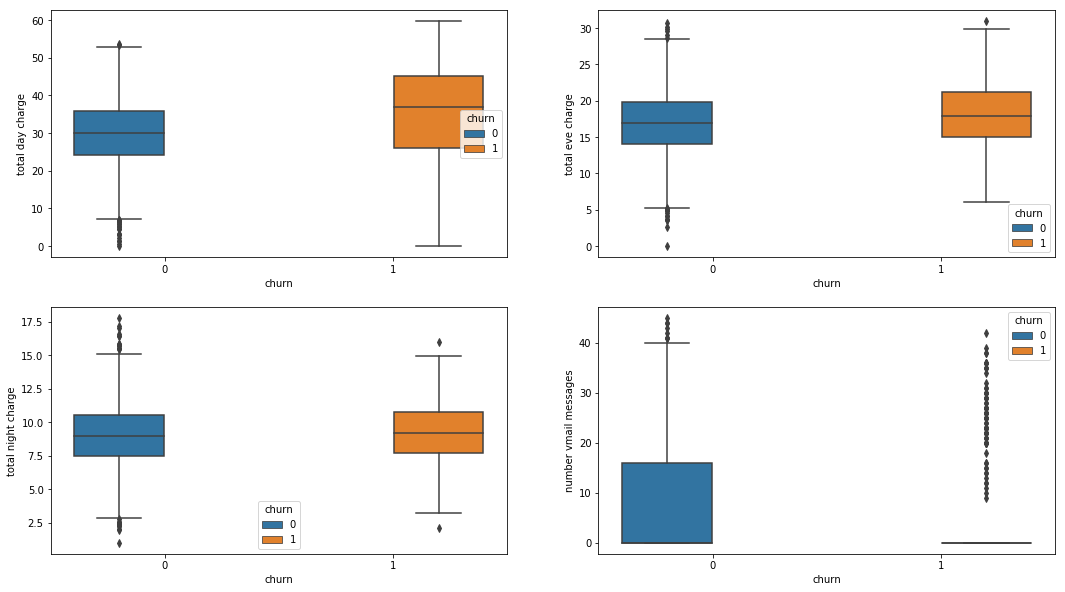

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (18, 10))
sns.boxplot(ax=ax1, x = 'churn', y = 'total day charge', hue = 'churn', data = df)
sns.boxplot(ax=ax2, x = 'churn', y = 'total eve charge', hue = 'churn', data = df)
sns.boxplot(ax=ax3, x = 'churn', y = 'total night charge', hue = 'churn', data = df)
sns.boxplot(ax=ax4, x = 'churn', y = 'number vmail messages', hue = 'churn', data = df)

Observation:
    
    From above figure it is seen that some outliers are present in some columns which needs to be removed.

# Removing Outliers

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[6.78649297e-01, 6.81972473e-01, 8.45700361e-04, ...,
        1.39593526e+00, 1.91345229e-02, 1.54248077e+00],
       [6.03169601e-01, 1.51449218e-01, 8.45700361e-04, ...,
        3.32079829e-01, 8.28475732e-01, 1.09207136e-01],
       [3.33312991e-01, 9.09339582e-01, 8.45700361e-04, ...,
        6.05046739e-01, 7.99247792e-01, 2.20748992e-01],
       ...,
       [8.73026212e-01, 1.84432874e+00, 1.40851395e+00, ...,
        8.87908160e-01, 1.24670800e+00, 6.90888794e-01],
       [1.35329082e+00, 2.09670115e+00, 1.40851395e+00, ...,
        7.67348612e-01, 7.40791913e-01, 4.81747884e-02],
       [1.07541867e+00, 6.82230182e-01, 8.45700361e-04, ...,
        1.77945680e+00, 8.37516838e-01, 1.58539414e+00]])

In [55]:
threshold=3
print(np.where(z>3))

(array([   3,    4,    5,    7,    9,   15,   22,   32,   32,   38,   41,
         41,   66,   67,   71,   77,   77,   81,  115,  115,  115,  135,
        144,  147,  179,  179,  180,  182,  184,  185,  198,  211,  214,
        219,  230,  231,  234,  241,  244,  244,  254,  258,  268,  269,
        272,  276,  277,  279,  289,  301,  314,  314,  319,  329,  332,
        343,  343,  351,  354,  356,  358,  360,  365,  365,  365,  372,
        377,  378,  382,  383,  405,  408,  416,  425,  444,  465,  474,
        483,  486,  488,  488,  491,  492,  493,  495,  498,  502,  503,
        504,  514,  514,  522,  529,  533,  533,  542,  542,  546,  547,
        553,  567,  569,  572,  586,  595,  595,  599,  601,  613,  616,
        619,  626,  636,  642,  648,  648,  674,  679,  694,  708,  712,
        712,  715,  716,  721,  734,  735,  737,  749,  756,  762,  762,
        762,  766,  771,  773,  777,  778,  779,  780,  781,  783,  790,
        792,  797,  808,  821,  821,  826,  830,  

In [56]:
df_new=df[(z<3).all(axis=1)]

In [57]:
#Checking the shape
print(df.shape,'\t\t',df_new.shape)

(3333, 24) 		 (2861, 24)


In [58]:
df=df_new
df.shape

(2861, 24)

### Now the outliers are removed.

# Model Training

In [59]:
df.head(2)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total minutes,total calls,total charge
0,16,126,1,1926,0,1,19,265.1,70,45.07,197.4,60,16.78,244.7,49,11.01,10.0,3,2.7,1,0,707.2,95,72.86
1,35,105,1,1575,0,1,20,161.6,83,27.47,195.5,64,16.62,254.4,61,11.45,13.7,3,3.7,1,0,611.5,124,55.54


In [60]:
#Splitting the data into input and output variable.
x=df.drop(columns=['churn','phone number'],axis=1)
x.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total minutes,total calls,total charge
0,16,126,1,0,1,19,265.1,70,45.07,197.4,60,16.78,244.7,49,11.01,10.0,3,2.70,1,707.2,95,72.86
1,35,105,1,0,1,20,161.6,83,27.47,195.5,64,16.62,254.4,61,11.45,13.7,3,3.70,1,611.5,124,55.54
2,31,135,1,0,0,0,243.4,74,41.38,121.2,71,10.30,162.6,62,7.32,12.2,5,3.29,0,527.2,123,59.00
6,19,119,2,0,1,18,218.2,48,37.09,348.5,69,29.62,212.6,76,9.57,7.5,7,2.03,3,779.3,109,76.28
8,18,115,0,0,0,0,184.5,57,31.37,351.6,41,29.89,215.8,48,9.71,8.7,4,2.35,1,751.9,62,70.97


In [61]:
y=df['churn']
y.head()

0    0
1    0
2    0
6    0
8    0
Name: churn, dtype: int64

In [62]:
#checking the shape of input and target variable
print(x.shape,'\t\t',y.shape)

(2861, 22) 		 (2861,)


In [63]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [64]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

In [65]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(2288, 22) 		 (573, 22)


In [66]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(2288,) 	 (573,)


In [67]:
#Importing all the model Library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [68]:
# All Algorithm by using for loop

model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) is:
0.9057591623036649
[[509   2]
 [ 52  10]]
             precision    recall  f1-score   support

          0       0.91      1.00      0.95       511
          1       0.83      0.16      0.27        62

avg / total       0.90      0.91      0.88       573

*****************************************************************************************


Accuracy score of GaussianNB(priors=None) is:
0.8900523560209425
[[476  35]
 [ 28  34]]
             precision    recall  f1-score   support

          0       0.94      0.93      0.94       511
          1       0.49      0.55      0.52        62

avg / total       0.90      0.89      0.89       573

*************************************************************

In [69]:
#Cross Validate the models

models=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),
       RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y,cv=15,scoring='accuracy')
    print("Model:",m)
    print("Score:",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print('************************************************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Score: [0.88481675 0.88481675 0.91099476 0.91623037 0.89528796 0.87958115
 0.89005236 0.89005236 0.92146597 0.91099476 0.88481675 0.90526316
 0.9        0.9        0.90526316]
Mean Score: 0.8986424175622303
Standard deviation: 0.012442870321915996
************************************************************************************************


Model: GaussianNB(priors=None)
Score: [0.85340314 0.85863874 0.87958115 0.88481675 0.86387435 0.89005236
 0.89528796 0.92146597 0.93193717 0.86910995 0.83769634 0.92631579
 0.85789474 0.92631579 0.87368421]
Mean Score: 0.8846716267107558
Standard deviation: 0.028980966023841086
************************************************************************************************


Mod

From above code LogisticRegression, SVC, DecissionTree, RandomForestClassifier, and GradientBoosting gives the best score so
we use GridSearchCV to find out the best parameters and the find the best model.

## Using GridSearchCV to find out best parameter

In [70]:
#Using GridSearchCV to find out the best parameter in LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters={'C':[1,10],'random_state':range(42,56)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


In [71]:
#Using GridSearchCV to find out the best parameter in DecisionTreeClassifier

parameters={'criterion':['gini','entropy'],'random_state':range(42,60)}
dtc=DecisionTreeClassifier()

clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 51}


In [72]:
#Using GridSearchCV to find out the best parameter in SVC

parameters={'kernel':('linear','rbf','poly'),'C':[1,10],'random_state':range(42,60)}
sv=SVC()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'kernel': 'rbf', 'random_state': 42}


In [73]:
#Using GridSearchCV to find out the best parameters in RandomForestClassifier

parameters={'n_estimators':[10,50,100,200,300],'max_depth':[4,5,6,],'criterion':['gini','entropy']}
RFC=RandomForestClassifier()

clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}


In [74]:
#Using GridSearchCV to find out the best parameter in GradientBoostingClassifier

parameters={'criterion':['friedman_mse','mse','mae'],'n_estimators':[100,200,300]}
gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 300}


In [75]:
#Using GridSearchCV to find out the best parameter in BaggingClassifier

parameters={'n_estimators':[10,50,100,200], 'random_state':range(42,60)}
bc=BaggingClassifier()

clf=GridSearchCV(bc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_estimators': 50, 'random_state': 52}


## Applying the result in models

In [76]:
LR=LogisticRegression(C=1,random_state=42)

DTC=DecisionTreeClassifier(criterion='entropy', random_state=51)

SVC=SVC(kernel='rbf',C=10,random_state=42)

RFC=RandomForestClassifier(n_estimators=50, max_depth=6,criterion='gini')

GBC=GradientBoostingClassifier(criterion='friedman_mse', random_state=42, learning_rate=0.1, n_estimators=300, max_depth=4)

BC=BaggingClassifier(n_estimators=50, max_features=1.0, max_samples=1.0, random_state=52)

In [77]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DTC))
models.append(('SupportVectorClassifier',SVC))
models.append(('RandomForestClassifier',RFC))
models.append(('GradientBoostingClassifier',GBC))
models.append(('BaggingClassifier',BC))

****************** LogisticRegression *****************************


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Accuracy Score: 0.9040139616055847


Cross Val Score: 0.8986442546155966


ROC_AUC_Score: 0.5777097405466827


[[508   3]
 [ 52  10]]


Classification_report 
              precision    recall  f1-score   support

          0       0.91      0.99      0.95       511
          1       0.77      0.16      0.27        62

avg / total       0.89      0.90      0.87       573



AxesSubplot(0.125,0.808774;0.775x0.0712264)



****************** DecisionTreeClassifier *****************************


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0

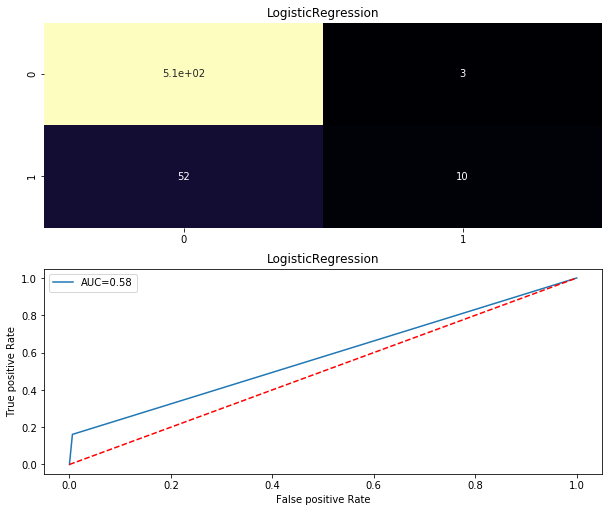

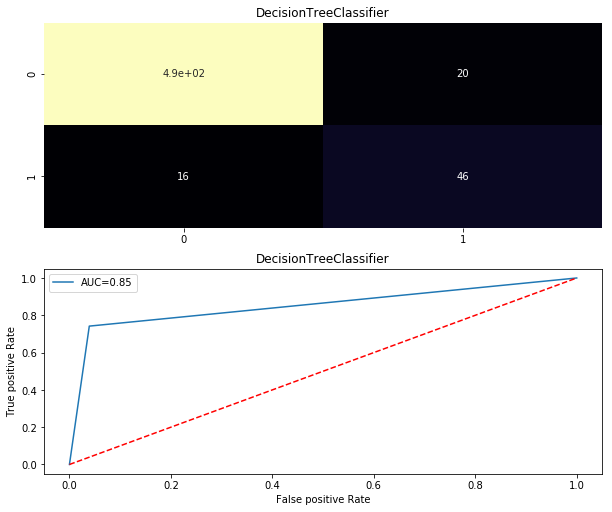

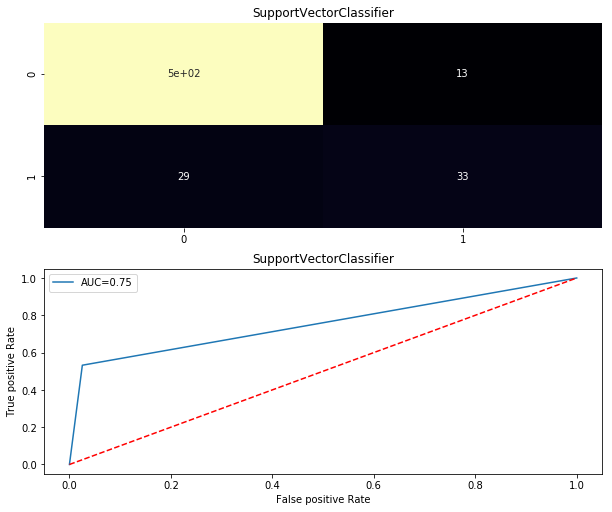

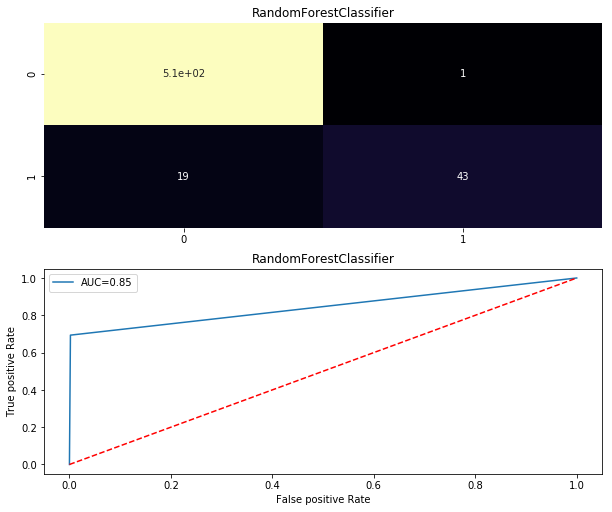

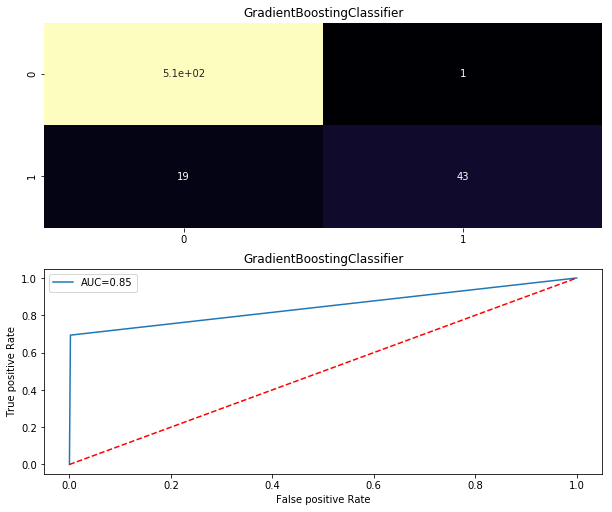

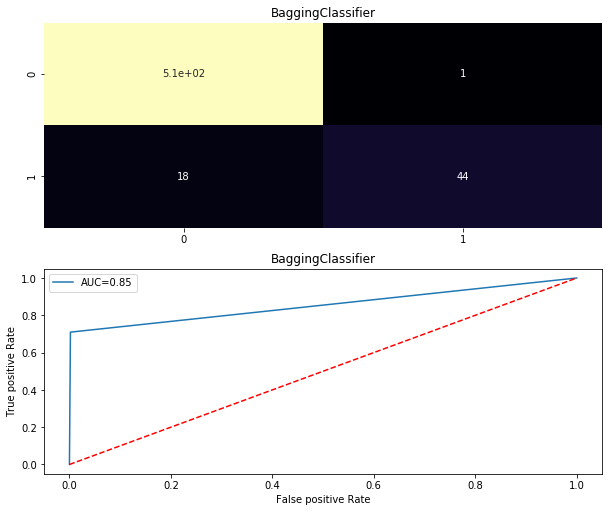

In [78]:
Model=[]
score=[]
CVS=[]
ROC_Score=[]

for name,model in models:
    print('******************',name,'*****************************')
    print('\n')
    Model.append(name)
   
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    
    #Cross Val Score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('Cross Val Score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_Score:',roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print('Classification_report \n',classification_report(y_test,pred))
    print('\n')
    
    #ConfusionMatrix via Heatmap
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False,cmap='magma'))
    plt.subplot(912)
    plt.title(name)
    
    #ROC Curve
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True positive Rate')
    plt.xlabel('False positive Rate')
    print('\n\n')

In [79]:
#Storing the result in a dataframe
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Val_Score':CVS,'ROC_AUC_Score':ROC_Score})
result

,Model,Accuracy_Score,Cross_Val_Score,ROC_AUC_Score
0,LogisticRegression,90.401396,89.864425,57.770974
1,DecisionTreeClassifier,93.717277,94.232571,85.139827
2,SupportVectorClassifier,92.670157,94.163314,75.340888
3,RandomForestClassifier,96.509599,95.912373,84.579572
4,GradientBoostingClassifier,96.509599,97.064572,84.579572
5,BaggingClassifier,96.684119,97.274364,85.386024


## I choose BaggingClassifier as my final model

In [80]:
#Saving this model
from sklearn.externals import joblib

#Save the model as a pickle in a file
joblib.dump(BC,'Telecom_Company_Customer_Churn_BC.csv')

['Telecom_Company_Customer_Churn_BC.csv']